# Example 3. Scoring method and ROC
---
To validaton the models, we must have choose the reasonable scoring method to give the certain hint which make us to investigate data easier. 

### Scoring methods
The score method are generally based on **confusion matrix** which has four categories as Fig. ![confusion_matrix](../doc/confusion_matrix.png) The positive category means the target class we care which is opposite from the negative category. In High engey physics, especially for particle identification, we usually summerize **TP** and **NN** to a category called *Correct tagged (CT)*, and **FN** and **FP** are called *"Miss tagged"* and *"Wrong tagged"*. Thus, we can define the two basic scoring method : ***error***, denoted as $\epsilon_{ERR}$, and ***accuracy***, denoted as $\epsilon_{ACC}$. The $\epsilon_{ERR}$ is 

$$
\begin{equation}
\epsilon_{ERR} = \frac{n_{F}}{n} = \frac{n_{FP}+n_{FN}}{n_{TP}+n_{TN}+n_{FP}+n_{FN}}\ ;
\end{equation}
$$

and the $\epsilon_{ACC}$ is

$$
\begin{equation}
\epsilon_{ACC} = \frac{n_{T}}{n} = \frac{n_{TP}+n_{TF}}{n_{TP}+n_{TN}+n_{FP}+n_{FN}}\ ,
\end{equation}
$$

where both values have the correlation with $\epsilon_{ACC}+\epsilon_{ERR}=1$; and the total number of data is $n = n_{T} + n_{F} = n_{TP}+n_{TN}+n_{FP}+n_{FN}$. Moreover, we also concern the **true positive rate (TPR)** and **false positive rate (FPT)** where they are defined as

$$
\begin{equation}
\epsilon_{TPR} = \frac{n_{TP}}{n_{TP}+n_{FN}}=\epsilon_{REC}
\end{equation}
$$

and 

$$
\begin{equation}
\epsilon_{FPR} = \frac{n_{FP}}{n_{FP}+n_{TN}}\ ,
\end{equation}
$$

respectively, where the $\epsilon_{TPR}$ means the rate of true predictions (correct tagged positive category) for the actural positive class. Thus it is also called **recall** $\epsilon_{REC}$. The $\epsilon_{FPR}$ means the rate of false predictions (wrong tagged positive category) for the actural negative class. For the particle identification in high engey physics, $\epsilon_{TPR}$ is called *"correct particle-tagged rate"*, and $\epsilon_{FPR}$ is called *"wrong particle-tagged rate"*. In additions, **precision (PRE)** is defined as

$$
\begin{equation}
\epsilon_{PRE} = \frac{n_{TP}}{n_{TP}+n_{FP}}\ ,
\end{equation}
$$

which prepresent the precision of the predicted target category. In the end, there a combinated score of **recall** and **precision** called **F1 score** which is defined as

$$
\begin{equation}
F_1 = 2\frac{\epsilon_{REC}\epsilon_{PRE}}{\epsilon_{REC}+\epsilon_{PRE}}\ .
\end{equation}
$$

When the model gives good preidction for target class, the $F_1$ will be closed to 1. 

### Receiver operating characterstic 
The **Receiver operating characterstic (ROC)** is a curve presented by **true positive rate (TPR)** and **false positive rate (FPT)**. In the idea case, i.e. the perfect model with $100\%$ prediction, the $\epsilon_{TPR}=1$ and $\epsilon_{FPR}=0$. We can quantify the **ROC** by integrating the area of **ROC**, it is called **area under the curve (AUC)**. Thus, **AUC** is 1 in the idea case, and 0.5 is in the random case with diagnal line.

- Start from **Confusion matrix** to introduce common scoring methods.
- Introduce the basic scoring method: *Precision*, *Recall* and *F1 scores*.
- Introduce the behavoir of **Receiver operating characteristic (ROC)** with logistic regression model case.

The data is using [breast cancer of Wisconsin](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)

### Import packages and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.svm             import SVC
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y) 
np.unique(y)
# 1: M (have cancer), 0: B (without cancer)

array([0, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 1. Confusion matrix

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

In [7]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

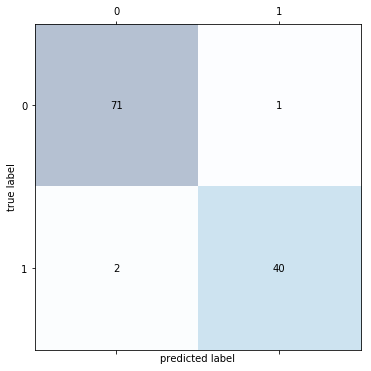

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### 2. Precision, Recall and F1 scores

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [10]:
print '%-10s %.3f'%('Precision:', precision_score(y_true=y_test, y_pred=y_pred))
print '%-10s %.3f'%('Recall:',    recall_score(y_true=y_test, y_pred=y_pred))
print '%-10s %.3f'%('F1:',         f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall:    0.952
F1:        0.964


### 3. Receiver operating characteristic (ROC)
We use logistic regression to make demonstration for **ROC** and **AUC**, since output value of logistic regression model can represent the probability, i.e. the different threshold of output value can have continually effects of the precision of classification.  

In [11]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition   import PCA
from sklearn.metrics         import roc_curve, auc
from scipy import interp

In [12]:
X_train2 = X_train[:, [4, 14]]
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
cv = StratifiedKFold( n_splits=3, random_state=1 )

In [13]:
fig = plt.figure(figsize=(10,8))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

In [14]:
for i, (train, test) in enumerate(cv.split(X_train2, y_train)):
    # Get probability from logistic regression model
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    
    # Get FPR and TPR of model correspoding to the threshold cuts of probability 
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    
    # Get mean TPR along FPR 0->1
    mean_tpr += interp(mean_fpr, fpr, tpr)/cv.n_splits 
    mean_tpr[0] = 0.0
    
    # Get AUC and plot
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)'%(i+1, roc_auc))

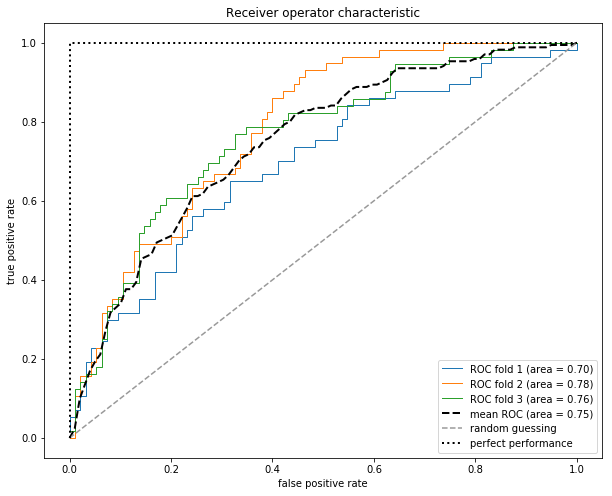

In [15]:
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)'%(mean_auc), lw=2)
plt.plot([0,1],   [0,1],   linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
plt.plot([0,0,1], [0,1,1], linestyle=':',  color='black',         label='perfect performance', lw=2 )
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver operator characteristic')
plt.legend(loc='lower right')
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [17]:
X_test2 = X_test[:, [4,14]]
pipe_svc.fit(X_train2, y_train)
y_pred2 = pipe_svc.predict(X_test2)

In [18]:
print 'ROC AUC %.3f'% roc_auc_score(y_true=y_test, y_score=y_pred2)
print 'Accuracy: %.3f'% accuracy_score(y_true=y_test, y_pred=y_pred2)

ROC AUC 0.671
Accuracy: 0.728
